In [139]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(149)
pd.set_option('display.max_colwidth', -1)


plt.ploto

In [4]:
def loaddata():
    return pd.read_csv('food_coded.csv')
data = loaddata()

In [68]:
# employment
probibility = data['employment'].value_counts() / data['employment'].value_counts().sum().tolist()
count_of_nas = pd.isna(data['employment']).sum()
values = probibility.cumsum().searchsorted(np.random.uniform(size=count_of_nas))
print probibility
for i in xrange(len(values)):
    if values[i] == 0: values[i] = 2
    elif values[i] == 1: values[i] = 3
    else: values[i] = 1
index = 0
for i in xrange(len(data.employment)):
    if pd.isnull(data.iloc[i].employment):
        data.loc[i, 'employment'] = values[index]
        index += 1


2.0    0.517241
3.0    0.465517
1.0    0.017241
Name: employment, dtype: float64


In [69]:
data.type_sports = data['type_sports'].str.lower()
data.type_sports.unique()


array(['car racing', 'basketball ', 'none', nan, 'softball', 'none.',
       'soccer', 'field hockey', 'running', 'soccer and basketball ',
       'intramural volleyball', 'hockey', 'dancing ', 'basketball',
       'tennis', 'tennis soccer gym', 'gaelic football', 'ice hockey',
       'lacrosse ', 'snowboarding', 'none organized', 'lacrosse',
       'softball ', 'dancing', 'wrestling ', 'no particular engagement ',
       'volleyball', 'soccer ', 'wrestling & rowing', 'wrestling',
       'skiing', 'skiing ', 'water polo and running ', 'rowing ',
       'tennis  ', 'recreational basketball, equestrian team',
       'rec volleyball', 'baseball', 'i danced in high school',
       'horse back riding', 'competitive skiing',
       'rowing, running, and cycling', 'softball and basketball',
       'marching band', 'collegiate water polo', 'none right now',
       'volleyball, lacrosse', 'none ', 'fotball', 'crew',
       'football, basketball, volleyball, golf', 'hockey, soccer, golf',
      

In [71]:
data = loaddata()
sports = ['car racing', 'basketball', 'softball', 'soccer', 'field hockey', 'running', 'volleyball', 'hockey', \
          'dancing', 'tennis', 'gym', 'football', 'lacrosse', 'snowboarding', 'wrestling', 'rowing', 'skiing', \
         'water polo', 'baseball', 'horse back riding', 'golf']
sports.sort(key=len, reverse=True)
print data.type_sports.value_counts().sample(frac=1).head(15)
def func(x):
    output = ''
    for sport in sports:
        if pd.isnull(x): continue
        x = x.lower()
        if x.find(sport) != -1:
            output += sport + ','
            x.replace(sport, '')
    if len(output) == 0: return np.NaN
    return output[:-1]
data.type_sports = data.type_sports.apply(func=func)

print "\n\nAfter Processing:\n", data.type_sports.value_counts().head(15)

Softball                   3
Gaelic Football            1
snowboarding               1
Soccer                     4
crew                       1
soccer                     3
tennis                     1
No, I don't play sport.    1
skiing                     1
Dancing                    1
volleyball                 1
Running                    1
softball                   4
Basketball                 2
Skiing                     1
Name: type_sports, dtype: int64


After Processing:
hockey                 12
softball               9 
soccer                 8 
volleyball             7 
basketball             6 
wrestling              4 
lacrosse               4 
tennis                 3 
skiing                 3 
field hockey,hockey    2 
running                2 
dancing                2 
volleyball,lacrosse    1 
baseball               1 
soccer,tennis,gym      1 
Name: type_sports, dtype: int64


In [75]:
# data.loc[:, [u'comfort_food_reasons_coded', u'comfort_food_reasons_coded.1', u'comfort_food_reasons']]
# 

In [76]:
# TODO: Remove useless columns: non-coded columns
columns_we7sha = ["life_rewarding", "comfort_food_reasons_coded", "comfort_food_reasons"]

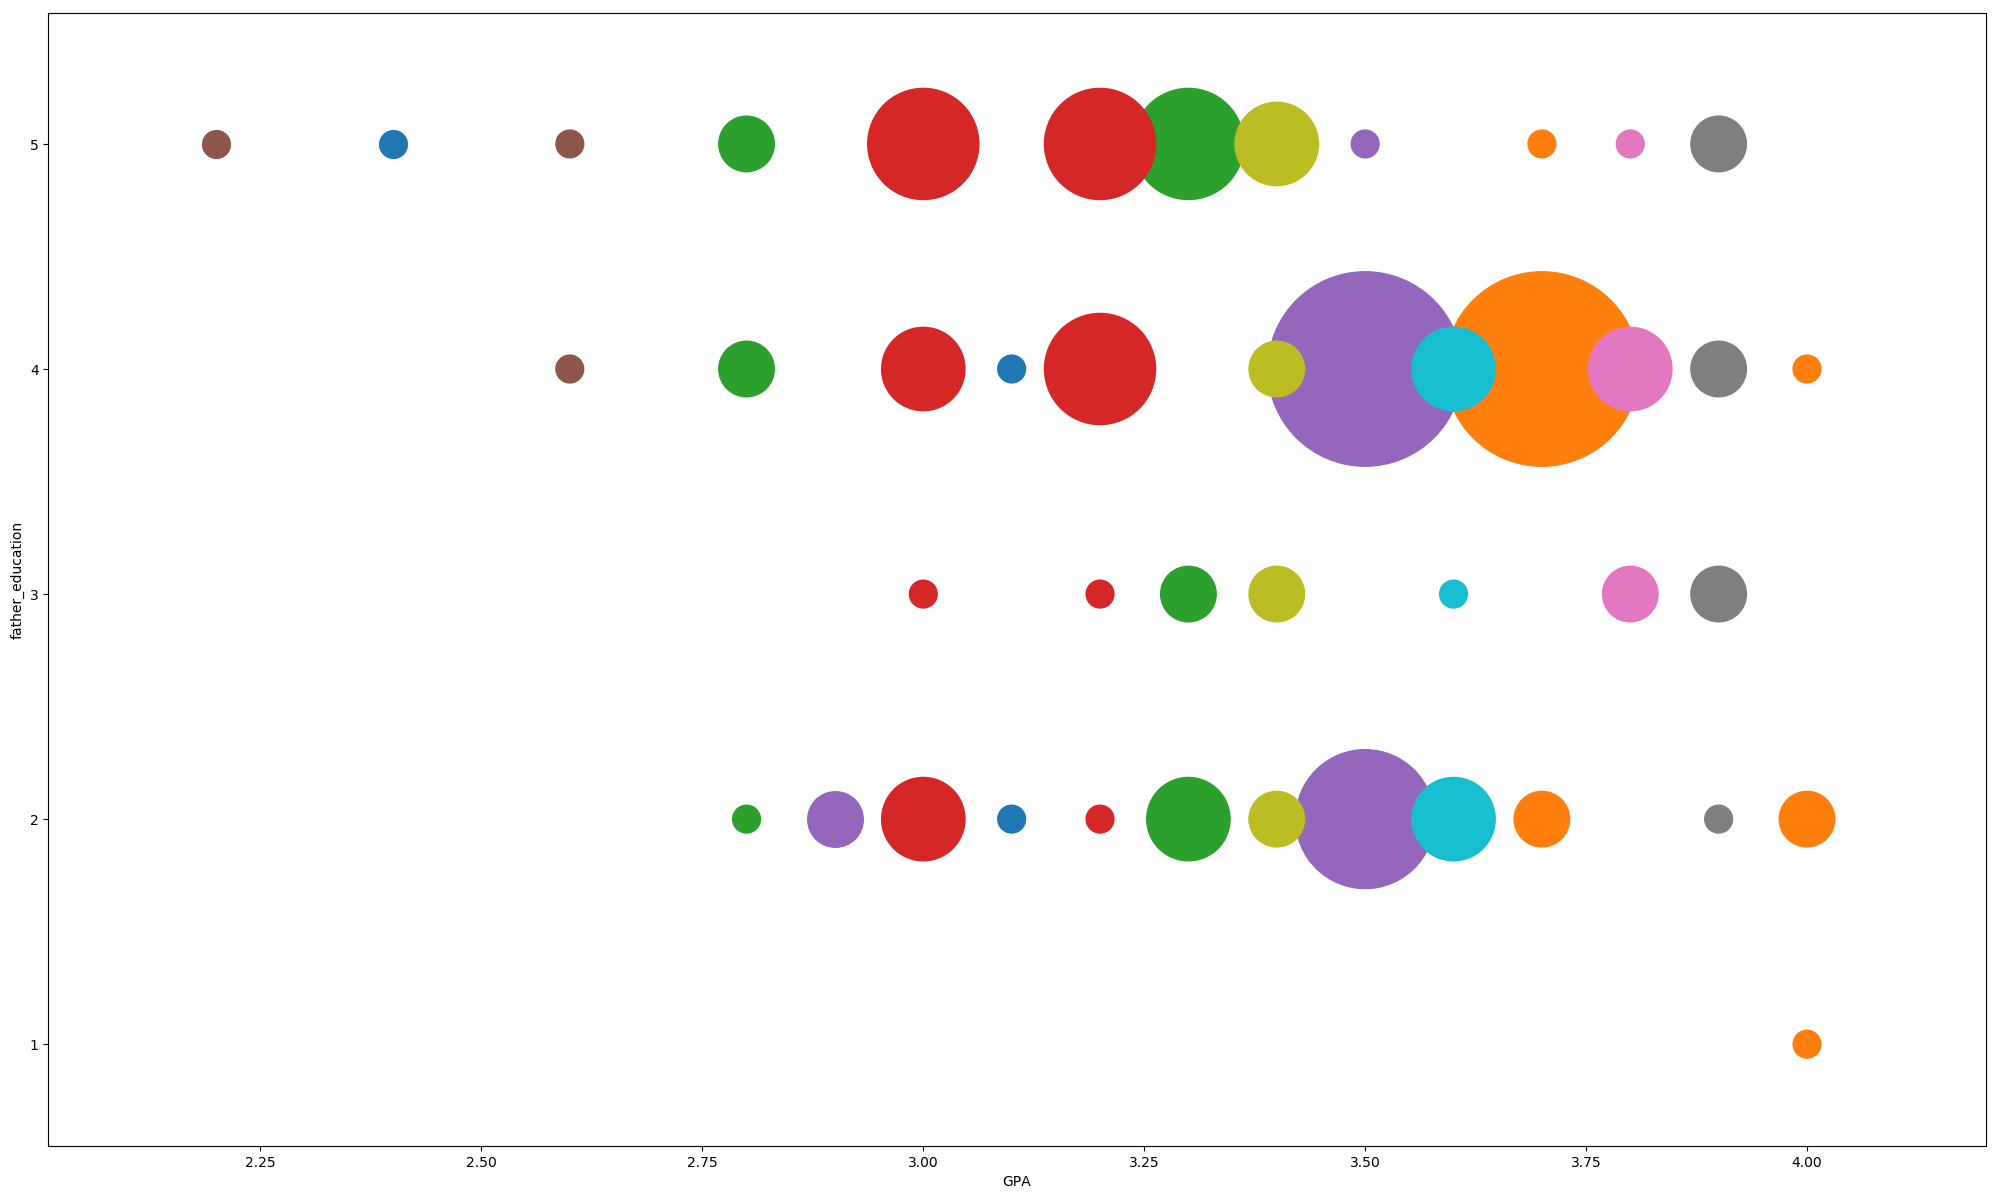

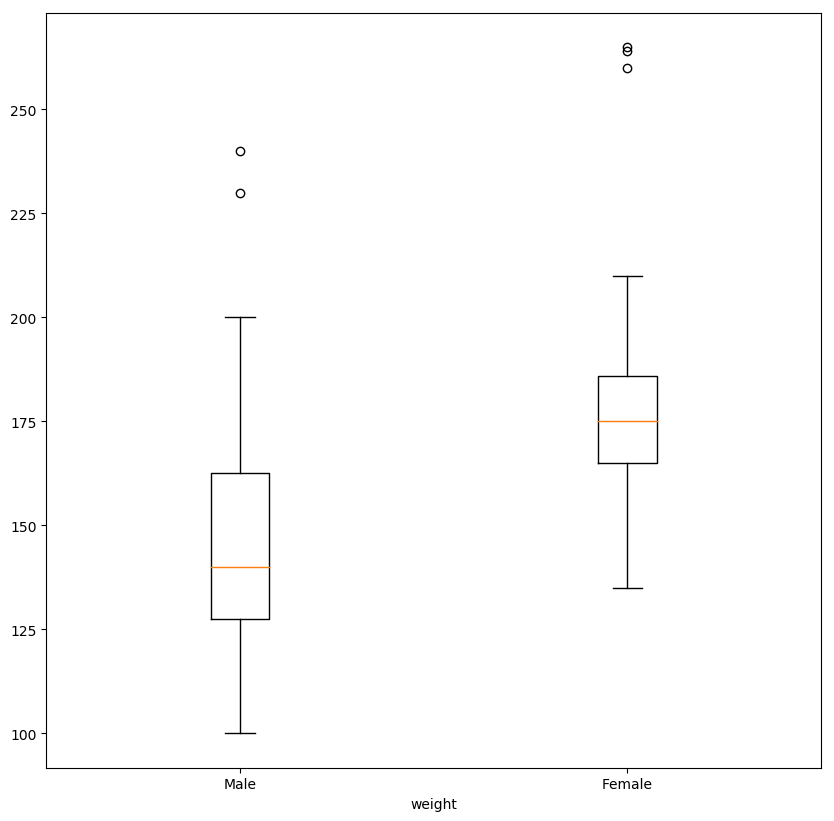

In [138]:
#### import matplotlib.pyplot as plt
# data.loc[:, 'new_col'] = 
# data.loc[:, 'new_col']
# print data.columns
# data.boxplot(u'weight')
# plt.show()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

data = loaddata()
# def func(row):
#     return unicode(row.weight)
# data.weight = data.apply(func, 1)
# data = data[data.weight.apply(lambda x: x.isnumeric())]
# data.weight = data.weight.apply(lambda x: int(x))

# data.boxplot('weight')
# plt.show()

# filtered_data
# data.loc[:, 'calories_day']


# %matplotlib notebook
# plt.gcf().clear()
# plt.hist(data.comfort_food_reasons_coded , align='mid', alpha=0.6, histtype='bar', ec='black')
# plt.xticks(range(1,10), ['Stress', 'Boredom', 'Dep', 'Hunger', 'Laziness', 'Cold', 'Happiness', 'TV', 'None'])
# plt.rcParams['figure.figsize'] = (20,5)
# plt.figure(figsize=(5,20))
# plt.show()


# plt.gcf().clear()
# plt.hist(x=data.grade_level)
# plt.rcParams['figure.figsize'] = (20,5)
# plt.figure(figsize=(5,20))
# plt.show()
# data.comfort_food_reasons_coded.unique()
# x = np.random.randn(500)
# inside = go.Histogram(x=list(data.comfort_food_reasons_coded))

# labels = [r"$L$", r"$\Gamma$", r"$X$", r"$U,K$", r"$\Gamma$"]

x_attribute = 'GPA'
y_attribute = 'eating_out'

def boxplot(attribute):
    plt.figure(dpi=100, figsize=(10,10))
    plt.rc('axes', axisbelow=True)
    plt.boxplot([list(data.query('Gender==1')[attribute].dropna()), list(data.query('Gender==2')[attribute].dropna())], labels=["Male", "Female"])
    plt.rc('axes', axisbelow=True)
#     plt.boxplot()
    plt.xlabel(attribute)
    plt.show()

def bubble_chart(x_attribute, y_attribute):    
    plt.figure(dpi=100, figsize=(25,15))
    
    x_axis = data[x_attribute].round(decimals=1).dropna().unique()
    for mark in x_axis:
        y_axis =  data.query('%s == %f' % (x_attribute, mark))[y_attribute].dropna().unique()
        s = [(20 * len(data.query('%s == %f & %s == %f' % (x_attribute, mark, y_attribute, i) ))) ** 2 for i in y_axis]
        plt.scatter([mark]*len(y_axis), y_axis, s = s)

    # plt.rcParams["figure.figsize"] = (15, 20)
    plt.ylabel(y_attribute)
    plt.xlabel(x_attribute)
    plt.margins(0.1)
#     plt.legend(handler= x_axis[1:3])
    plt.figure(dpi=50)
    plt.show()

bubble_chart('GPA', 'father_education')
boxplot('weight')

In [124]:
data['weight'].dropna()
data.query('Gender==1')['weight'].dropna()

1      155.0
3      240.0
4      190.0
5      190.0
7      137.0
8      180.0
9      125.0
10     116.0
11     110.0
13     123.0
16     145.0
18     135.0
24     105.0
25     125.0
30     115.0
33     128.0
34     150.0
35     150.0
36     150.0
37     170.0
38     150.0
41     120.0
42     135.0
43     100.0
44     170.0
45     113.0
55     192.0
57     140.0
58     155.0
59     155.0
       ...  
81     190.0
82     170.0
83     127.0
84     167.0
85     140.0
86     190.0
89     129.0
91     135.0
97     155.0
99     165.0
100    125.0
101    160.0
102    135.0
103    130.0
104    230.0
105    125.0
106    130.0
107    165.0
108    128.0
109    200.0
110    160.0
112    129.0
113    170.0
116    170.0
117    113.0
118    140.0
120    156.0
121    180.0
122    120.0
124    135.0
Name: weight, Length: 75, dtype: float64

In [104]:
data.father_profession.unique()

array(['profesor ', 'Self employed ', 'owns business', 'Mechanic ', 'IT',
       'Taxi Driver', 'Assembler ', 'Business guy',
       'High School Principal', 'commissioner of erie county ', 'Idk',
       'Home Marker ', 'Shirt designer ', 'business owner',
       'Commidity trader ', 'Hockey Coach', 'Construction ',
       'self employed construction ', 'Engineer', 'architect', 'CFO',
       'European logistics director ', 'accountant ',
       'Commercial Real Estate', 'Manager at Pepsi', 'VP of ',
       'Beverage and Food Sales', 'Dentist ', 'Electrical Engineer',
       'Radio Telecommunications Manager', nan, 'deceased', 'Lawyer',
       'landscaping ', 'Vice President of a company',
       'Owns his own promotional company ', 'Optometrist ',
       'Biohemical Waste Elimination', 'Corporate Manager ',
       'Small business owner ', 'Welder', 'Design Engineer', 'Unknown ',
       'Banker', 'subcontractor ', 'small business owner ',
       'House Appraiser', 'not sure', 'Fireman',

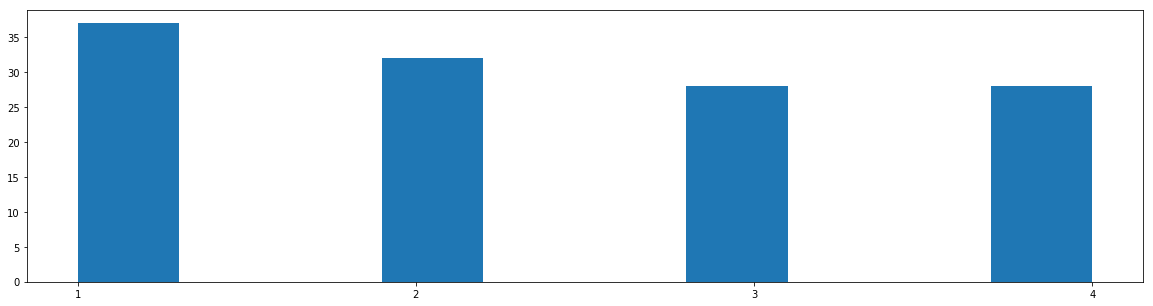

In [65]:
## grade_level histo
labels = [1, 2, 3, 4]

plt.hist(data.grade_level, rwidth=1)
ind = np.arange(5)
plt.xticks(x, labels, rotation='horizontal')
# plt.subplots_adjust(bottom=0.15)
plt.show()

array([ 5.,  2.,  4.,  1.,  3.])

In [80]:
data = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', low_memory=False)


In [89]:
print data.columns
data[u'CONTRIBUTING FACTOR VEHICLE 1'].unique()

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
       u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'UNIQUE KEY', u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2',
       u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5'],
      dtype='object')


array(['Following Too Closely', 'Unspecified',
       'Failure to Yield Right-of-Way', 'Animals Action',
       'Cell Phone (hands-free)', 'Driver Inattention/Distraction',
       'Aggressive Driving/Road Rage', 'Oversized Vehicle',
       'Backing Unsafely', 'Other Vehicular',
       'Passing or Lane Usage Improper', 'Outside Car Distraction',
       'Unsafe Speed', 'Turning Improperly', 'Passenger Distraction',
       'View Obstructed/Limited', nan,
       'Reaction to Other Uninvolved Vehicle',
       'Traffic Control Disregarded', 'Tire Failure/Inadequate',
       'Steering Failure', 'Brakes Defective', 'Unsafe Lane Changing',
       'Fatigued/Drowsy',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Glare',
       'Driver Inexperience', 'Failure to Keep Right', 'Fell Asleep',
       'Pavement Slippery', 'Alcohol Involvement', 'Pavement Defective',
       'Traffic Control Device Improper/Non-Working', 'Obstruction/Debris',
       'Lane Marking Improper/Inadequate', 